# Import Library and Load Data

In [ ]:
import pandas as pd
import numpy as np

# Muat data dari file Excel
df = pd.read_excel('/content/combined_05_label1-01062025.xlsx')

# Tampilkan informasi awal dataset
print("Informasi Awal Dataset:")
print(df.head())
print(df.info())
print(df.shape)


Informasi Awal Dataset:
             Name            Handle                 Timestamp  Verified  \
0             Yuu     @Argoonautkun  2023-04-30T06:07:52.000Z     False   
1  Wahyu Prasetya  @MrWahyuPrasetya  2023-04-30T03:39:10.000Z     False   
2            Dhea      @dheawardani  2023-04-29T14:37:36.000Z     False   
3           C-Cat          @WYATB23  2023-04-29T08:18:46.000Z     False   
4         Margaux  @killiantology__  2023-04-27T14:59:37.000Z     False   

                                                text  Comments  Retweets  \
0  Tipes?\nMending ke dokter, kalau sakit biasa m...         0         0   
1  Tapi pas bapak sakit DBD (saya umur 8, kelas 4...         0         0   
2  Kayak aku waktu itu sakit DBD dan tifus harus ...         0         0   
3  Merasa kurang itu baik nder , merasa ovt itu c...         0         1   
4  Dulu bokap sempet sakit dbd abis itu langsung ...         0         0   

  Likes Analytics Tags Mentions                          Emojis  \
0

# 2. Penghapusan Metadata Duplikat

In [ ]:
# Cek duplikat berdasarkan kolom tertentu (misalnya 'text')
df_before = df.shape[0]
df = df.drop_duplicates(subset=['text'], keep='first')

print(f"\nSetelah Penghapusan Duplikat:")
print(f"Total Baris Awal: {df_before}")
print(f"Total Baris Setelah Penghapusan: {df.shape[0]}")
print(df.head())



Setelah Penghapusan Duplikat:
Total Baris Awal: 3909
Total Baris Setelah Penghapusan: 3562
             Name            Handle                 Timestamp  Verified  \
0             Yuu     @Argoonautkun  2023-04-30T06:07:52.000Z     False   
1  Wahyu Prasetya  @MrWahyuPrasetya  2023-04-30T03:39:10.000Z     False   
2            Dhea      @dheawardani  2023-04-29T14:37:36.000Z     False   
3           C-Cat          @WYATB23  2023-04-29T08:18:46.000Z     False   
4         Margaux  @killiantology__  2023-04-27T14:59:37.000Z     False   

                                                text  Comments  Retweets  \
0  Tipes?\nMending ke dokter, kalau sakit biasa m...         0         0   
1  Tapi pas bapak sakit DBD (saya umur 8, kelas 4...         0         0   
2  Kayak aku waktu itu sakit DBD dan tifus harus ...         0         0   
3  Merasa kurang itu baik nder , merasa ovt itu c...         0         1   
4  Dulu bokap sempet sakit dbd abis itu langsung ...         0         0   



# Remove Ads

In [ ]:
# Contoh penghapusan iklan berdasarkan kata-kata tertentu
iklan_keywords = ['https://t.co/', '#ad', 'buy now']
df_before = df.shape[0]

# Menggunakan fillna untuk menggantikan NaN dengan string kosong
df['text'] = df['text'].fillna('')

# Menggunakan str.contains dengan na=False untuk menganggap NaN sebagai False
df = df[~df['text'].str.contains('|'.join(iklan_keywords), case=False, na=False)]

print(f"\nSetelah Penghapusan Iklan:")
print(f"Total Baris Awal: {df_before}")
print(f"Total Baris Setelah Penghapusan: {df.shape[0]}")
print(df.head())



Setelah Penghapusan Iklan:
Total Baris Awal: 3562
Total Baris Setelah Penghapusan: 3545
             Name            Handle                 Timestamp  Verified  \
0             Yuu     @Argoonautkun  2023-04-30T06:07:52.000Z     False   
1  Wahyu Prasetya  @MrWahyuPrasetya  2023-04-30T03:39:10.000Z     False   
2            Dhea      @dheawardani  2023-04-29T14:37:36.000Z     False   
3           C-Cat          @WYATB23  2023-04-29T08:18:46.000Z     False   
4         Margaux  @killiantology__  2023-04-27T14:59:37.000Z     False   

                                                text  Comments  Retweets  \
0  Tipes?\nMending ke dokter, kalau sakit biasa m...         0         0   
1  Tapi pas bapak sakit DBD (saya umur 8, kelas 4...         0         0   
2  Kayak aku waktu itu sakit DBD dan tifus harus ...         0         0   
3  Merasa kurang itu baik nder , merasa ovt itu c...         0         1   
4  Dulu bokap sempet sakit dbd abis itu langsung ...         0         0   

  L

#4. Pemfilteran Bahasa Indonesia

## Install Lib

In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=ee84301509e3c363bf5143b24bbbf1075bfa1f20cf93e45776d77f4004986baa
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
# Pemfilteran Bahasa Indonesia menggunakan Google Translate
import pandas as pd
import numpy as np
from googletrans import Translator
import re
import time

In [ ]:


# Memuat data yang sudah dibersihkan dari iklan
df_before = df.shape[0]
print(f"Jumlah data sebelum pemfilteran bahasa: {df_before}")

# Inisialisasi translator
translator = Translator()

# Fungsi untuk mendeteksi bahasa menggunakan Google Translate
def detect_language(text):
    if pd.isna(text) or text == '':
        return 'unknown'
    try:
        # Menambahkan delay untuk menghindari pembatasan API
        time.sleep(0.5)
        detected = translator.detect(text[:100])  # Menggunakan 100 karakter pertama untuk efisiensi
        return detected.lang
    except Exception as e:
        print(f"Error dalam deteksi bahasa: {e}")
        return 'unknown'

# Menerapkan deteksi bahasa pada sampel data (untuk menghemat waktu)
# Dalam implementasi sebenarnya, Anda bisa menerapkan pada seluruh dataset
sample_size = min(100, df.shape[0])  # Mengambil sampel 100 data atau seluruh data jika kurang dari 100
df_sample = df.sample(sample_size)

print("Mendeteksi bahasa untuk sampel data...")
df_sample['language'] = df_sample['text'].apply(detect_language)

# Menghitung distribusi bahasa dalam sampel
language_counts = df_sample['language'].value_counts()
print("\nDistribusi bahasa dalam sampel:")
print(language_counts)

# Filter untuk hanya menyimpan tweet berbahasa Indonesia
indonesian_sample = df_sample[df_sample['language'] == 'id']
print(f"\nJumlah tweet berbahasa Indonesia dalam sampel: {indonesian_sample.shape[0]} dari {sample_size}")

# Untuk implementasi sebenarnya pada seluruh dataset
# Uncomment kode di bawah ini jika ingin menerapkan pada seluruh dataset
print("\nMendeteksi bahasa untuk seluruh dataset...")
df['language'] = df['text'].apply(detect_language)
df = df[df['language'] == 'id']
print(f"Jumlah data setelah pemfilteran bahasa: {df.shape[0]}")

# Untuk tujuan demonstrasi, kita akan menggunakan pendekatan berbasis kata kunci
# untuk mengidentifikasi tweet berbahasa Indonesia vs Melayu
indonesian_keywords = ['yang', 'dan', 'di', 'ini', 'itu', 'dengan', 'untuk', 'tidak', 'dalam', 'dari', 'akan', 'pada', 'juga', 'saya', 'ke', 'bisa', 'ada', 'sudah', 'atau', 'lebih', 'oleh', 'saat', 'harus', 'banyak', 'telah', 'adalah', 'seperti', 'mereka', 'kita', 'jika', 'tapi', 'dapat', 'kami', 'karena', 'masih', 'belum', 'tersebut', 'sangat', 'menjadi', 'hanya']
malay_keywords = ['yang', 'dan', 'di', 'ini', 'itu', 'dengan', 'untuk', 'tidak', 'dalam', 'daripada', 'akan', 'pada', 'juga', 'saya', 'ke', 'boleh', 'ada', 'sudah', 'atau', 'lebih', 'oleh', 'masa', 'perlu', 'banyak', 'telah', 'adalah', 'seperti', 'mereka', 'kita', 'jika', 'tapi', 'dapat', 'kami', 'kerana', 'masih', 'belum', 'tersebut', 'sangat', 'menjadi', 'hanya']

def is_likely_indonesian(text):
    if pd.isna(text) or text == '':
        return False

    text = text.lower()
    indonesian_count = sum(1 for word in indonesian_keywords if f" {word} " in f" {text} ")
    malay_count = sum(1 for word in malay_keywords if f" {word} " in f" {text} " and word not in indonesian_keywords)

    # Jika lebih banyak kata kunci Indonesia daripada Melayu yang unik
    return indonesian_count > malay_count

print("\nMenggunakan pendekatan berbasis kata kunci untuk filter bahasa Indonesia...")
df['is_indonesian'] = df['text'].apply(is_likely_indonesian)
df_filtered_language = df[df['is_indonesian']]
print(f"Jumlah data setelah pemfilteran bahasa (pendekatan kata kunci): {df_filtered_language.shape[0]}")

# Simpan dataset yang telah difilter berdasarkan bahasa
df = df_filtered_language.drop(columns=['is_indonesian'])


Jumlah data sebelum pemfilteran bahasa: 3545
Mendeteksi bahasa untuk sampel data...

Distribusi bahasa dalam sampel:
language
id    89
ms    10
su     1
Name: count, dtype: int64

Jumlah tweet berbahasa Indonesia dalam sampel: 89 dari 100

Mendeteksi bahasa untuk seluruh dataset...
Jumlah data setelah pemfilteran bahasa: 3117

Menggunakan pendekatan berbasis kata kunci untuk filter bahasa Indonesia...
Jumlah data setelah pemfilteran bahasa (pendekatan kata kunci): 2480


<ipython-input-6-4f13febd85fc>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_indonesian'] = df['text'].apply(is_likely_indonesian)


In [ ]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import emoji
from google.colab import files

# Fungsi pembersihan teks yang diperluas
def clean_text_extended(text):
    if pd.isna(text) or text == '':
        return text

    # Menghapus emoji
    text = emoji.replace_emoji(text, replace='')

    # Menghapus mentions, hashtags, dan links
    text = re.sub(r'@\w+|#\w+|https?://\S+|www\.\S+', '', text)

    # Menghapus karakter khusus dan simbol
    text = re.sub(r'[^\w\s]', ' ', text)

    # Menghapus angka
    text = re.sub(r'\d+', '', text)

    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Proses pembersihan teks
df_before = df.shape[0]
print(f"\nJumlah data sebelum pembersihan: {df_before}")

# Membuat kolom baru untuk teks yang sudah dibersihkan
df['text_cleaned'] = df['text'].apply(clean_text_extended)

# Menampilkan perbandingan teks
print("\nContoh hasil pembersihan teks:")
for i in range(min(5, df.shape[0])):
    print(f"Original: {df.iloc[i]['text']}")
    print(f"Cleaned : {df.iloc[i]['text_cleaned']}")
    print("-" * 50)

# Verifikasi tidak ada kolom yang terhapus
print("\nKolom yang tersedia:")
print(df.columns.tolist())

# Simpan hasil ke file Excel
output_file = 'tweets_with_cleaned_text.xlsx'
df.to_excel(output_file, index=False)
print(f"\nData telah disimpan ke {output_file}")

# Download file dari Google Colab
files.download(output_file)



Jumlah data sebelum pembersihan: 2480

Contoh hasil pembersihan teks:
Original: Tipes?
Mending ke dokter, kalau sakit biasa minum obat pasti sembuh.
Pengalaman kemarin bgt, demam trus biasa minum panadol/obat demam pasti sembuh ini engga. Langsung ke dokter trus cek ternyata kena DBD. 
Lewat 1 hari ud ke isekai.  https://x.com/convomf/status/convomf/status/1652552140177707009…
Cleaned : Tipes Mending ke dokter kalau sakit biasa minum obat pasti sembuh Pengalaman kemarin bgt demam trus biasa minum panadol obat demam pasti sembuh ini engga Langsung ke dokter trus cek ternyata kena DBD Lewat hari ud ke isekai
--------------------------------------------------
Original: Tapi pas bapak sakit DBD (saya umur 8, kelas 4 SD), kami yg tinggal serumah harus tes darah. Ketahuan kalau goldar saya sama dgn bapak.
Muka juga ga jauh dari gabungan muka ibu & bapak.
Lama kelamaan, kulit saya juga mjdi lebih cerah sama seperti ibu (FYI, ibu keturunan Chinese).
Cleaned : Tapi pas bapak sakit DBD saya umu

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Memuat data yang sudah dibersihkan dari mentions, hashtags, dan links
df = pd.read_excel('tweets_with_cleaned_text.xlsx')

# Menampilkan informasi awal dataset
print("Informasi Awal Dataset:")
print(f"Jumlah data: {df.shape[0]}")
print(f"Kolom: {df.columns.tolist()}")
print(df.head())


Informasi Awal Dataset:
Jumlah data: 2480
Kolom: ['Name', 'Handle', 'Timestamp', 'Verified', 'text', 'Comments', 'Retweets', 'Likes', 'Analytics', 'Tags', 'Mentions', 'Emojis', 'Profile Image', 'Tweet Link', 'Tweet ID', 'language', 'text_cleaned']
             Name            Handle                 Timestamp  Verified  \
0             Yuu     @Argoonautkun  2023-04-30T06:07:52.000Z     False   
1  Wahyu Prasetya  @MrWahyuPrasetya  2023-04-30T03:39:10.000Z     False   
2            Dhea      @dheawardani  2023-04-29T14:37:36.000Z     False   
3           C-Cat          @WYATB23  2023-04-29T08:18:46.000Z     False   
4         Margaux  @killiantology__  2023-04-27T14:59:37.000Z     False   

                                                text  Comments  Retweets  \
0  Tipes?\nMending ke dokter, kalau sakit biasa m...         0         0   
1  Tapi pas bapak sakit DBD (saya umur 8, kelas 4...         0         0   
2  Kayak aku waktu itu sakit DBD dan tifus harus ...         0         0 

# Lowering Case --- DON



Jumlah data sebelum konversi: 2480

Contoh hasil konversi:
Original: Tipes?
Mending ke dokter, kalau sakit biasa minum obat pasti sembuh.
Pengalaman kemarin bgt, demam trus biasa minum panadol/obat demam pasti sembuh ini engga. Langsung ke dokter trus cek ternyata kena DBD. 
Lewat 1 hari ud ke isekai.  https://x.com/convomf/status/convomf/status/1652552140177707009…
Cleaned : Tipes Mending ke dokter kalau sakit biasa minum obat pasti sembuh Pengalaman kemarin bgt demam trus biasa minum panadol obat demam pasti sembuh ini engga Langsung ke dokter trus cek ternyata kena DBD Lewat hari ud ke isekai
Lower   : tipes mending ke dokter kalau sakit biasa minum obat pasti sembuh pengalaman kemarin bgt demam trus biasa minum panadol obat demam pasti sembuh ini engga langsung ke dokter trus cek ternyata kena dbd lewat hari ud ke isekai
--------------------------------------------------
Original: Tapi pas bapak sakit DBD (saya umur 8, kelas 4 SD), kami yg tinggal serumah harus tes darah. Ketahuan

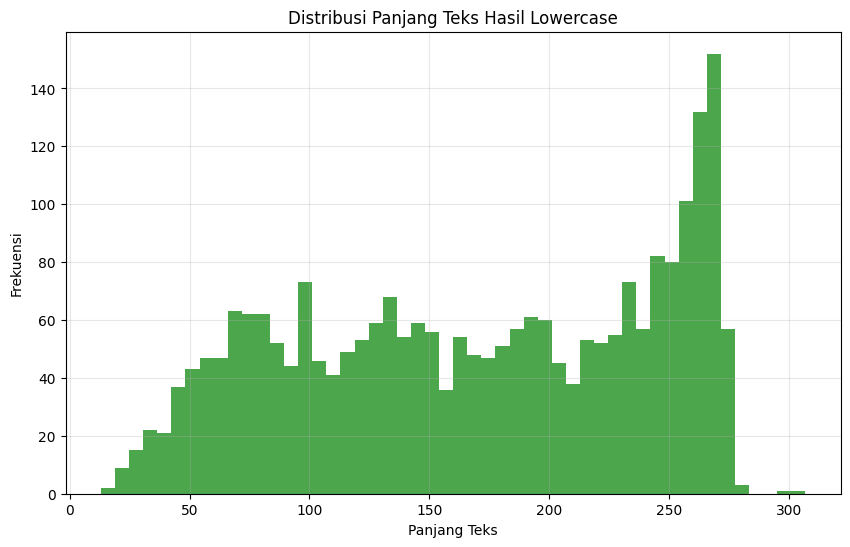

Rata-rata panjang teks lowercase: 169.46 karakter
Panjang minimum: 13 karakter
Panjang maksimum: 307 karakter

File berhasil disimpan sebagai processed_data_with_lowercase_20250601_070050.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from google.colab import files

#df sudah ada dengan kolom 'text' dan 'text_cleaned'

# 1. Konversi ke lowercase dengan kolom baru
df_before = df.shape[0]
print(f"\nJumlah data sebelum konversi: {df_before}")

# Membuat kolom baru untuk lowercase dari text_cleaned
df['text_cleaned_lower'] = df['text_cleaned'].str.lower()  # Menggunakan metode vectorized

print("\nContoh hasil konversi:")
for i in range(min(5, df.shape[0])):
    print(f"Original: {df.iloc[i]['text']}")
    print(f"Cleaned : {df.iloc[i]['text_cleaned']}")
    print(f"Lower   : {df.iloc[i]['text_cleaned_lower']}")
    print("-" * 50)

print(f"Jumlah data setelah konversi: {df.shape[0]}")

# 2. EDA untuk versi lowercase
df['text_cleaned_lower_length'] = df['text_cleaned_lower'].str.len().fillna(0)

plt.figure(figsize=(10, 6))
plt.hist(df['text_cleaned_lower_length'], bins=50, alpha=0.7, color='green')
plt.title('Distribusi Panjang Teks Hasil Lowercase')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Rata-rata panjang teks lowercase: {df['text_cleaned_lower_length'].mean():.2f} karakter")
print(f"Panjang minimum: {df['text_cleaned_lower_length'].min()} karakter")
print(f"Panjang maksimum: {df['text_cleaned_lower_length'].max()} karakter")

# 3. Ekspor data dengan semua versi teks
current_datetime = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
export_filename = f"processed_data_with_lowercase_{current_datetime}.csv"

# Simpan semua kolom termasuk yang asli
df.to_csv(export_filename, index=False)

print(f"\nFile berhasil disimpan sebagai {export_filename}")
files.download(export_filename)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from nltk.tokenize import word_tokenize
from collections import Counter
from google.colab import files

# Install library tambahan jika diperlukan
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('punkt', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True


Jumlah data sebelum tokenisasi: 2480

Contoh hasil tokenisasi:
Text Original: Tipes?
Mending ke dokter, kalau sakit biasa minum obat pasti sembuh.
Pengalaman kemarin bgt, demam trus biasa minum panadol/obat demam pasti sembuh ini engga. Langsung ke dokter trus cek ternyata kena DBD. 
Lewat 1 hari ud ke isekai.  https://x.com/convomf/status/convomf/status/1652552140177707009…
Text Cleaned Lower: tipes mending ke dokter kalau sakit biasa minum obat pasti sembuh pengalaman kemarin bgt demam trus biasa minum panadol obat demam pasti sembuh ini engga langsung ke dokter trus cek ternyata kena dbd lewat hari ud ke isekai
Tokens: ['tipes', 'mending', 'ke', 'dokter', 'kalau', 'sakit', 'biasa', 'minum', 'obat', 'pasti', 'sembuh', 'pengalaman', 'kemarin', 'bgt', 'demam', 'trus', 'biasa', 'minum', 'panadol', 'obat', 'demam', 'pasti', 'sembuh', 'ini', 'engga', 'langsung', 'ke', 'dokter', 'trus', 'cek', 'ternyata', 'kena', 'dbd', 'lewat', 'hari', 'ud', 'ke', 'isekai']
------------------------------

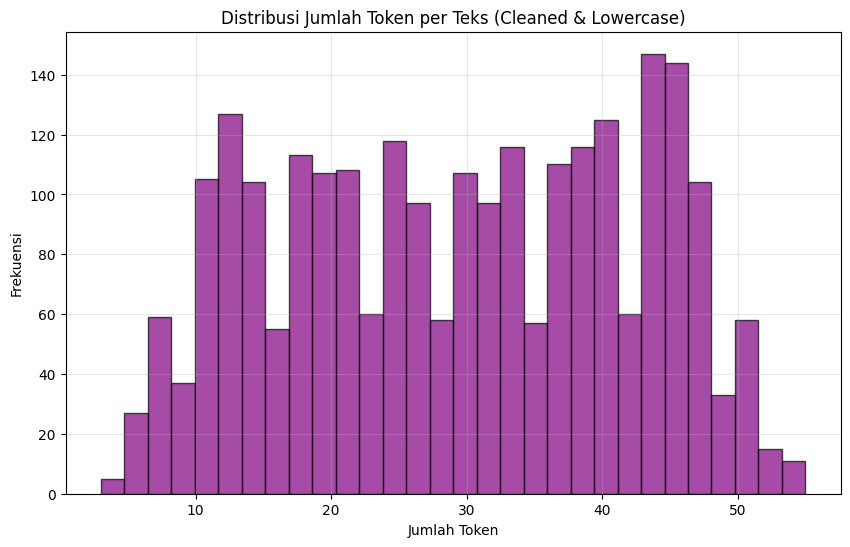


Statistik Token:
Rata-rata: 29.36
Minimum: 3
Maksimum: 55


<ipython-input-15-39a9e3635e23>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[token[0] for token in top_tokens], y=[token[1] for token in top_tokens], palette='viridis')


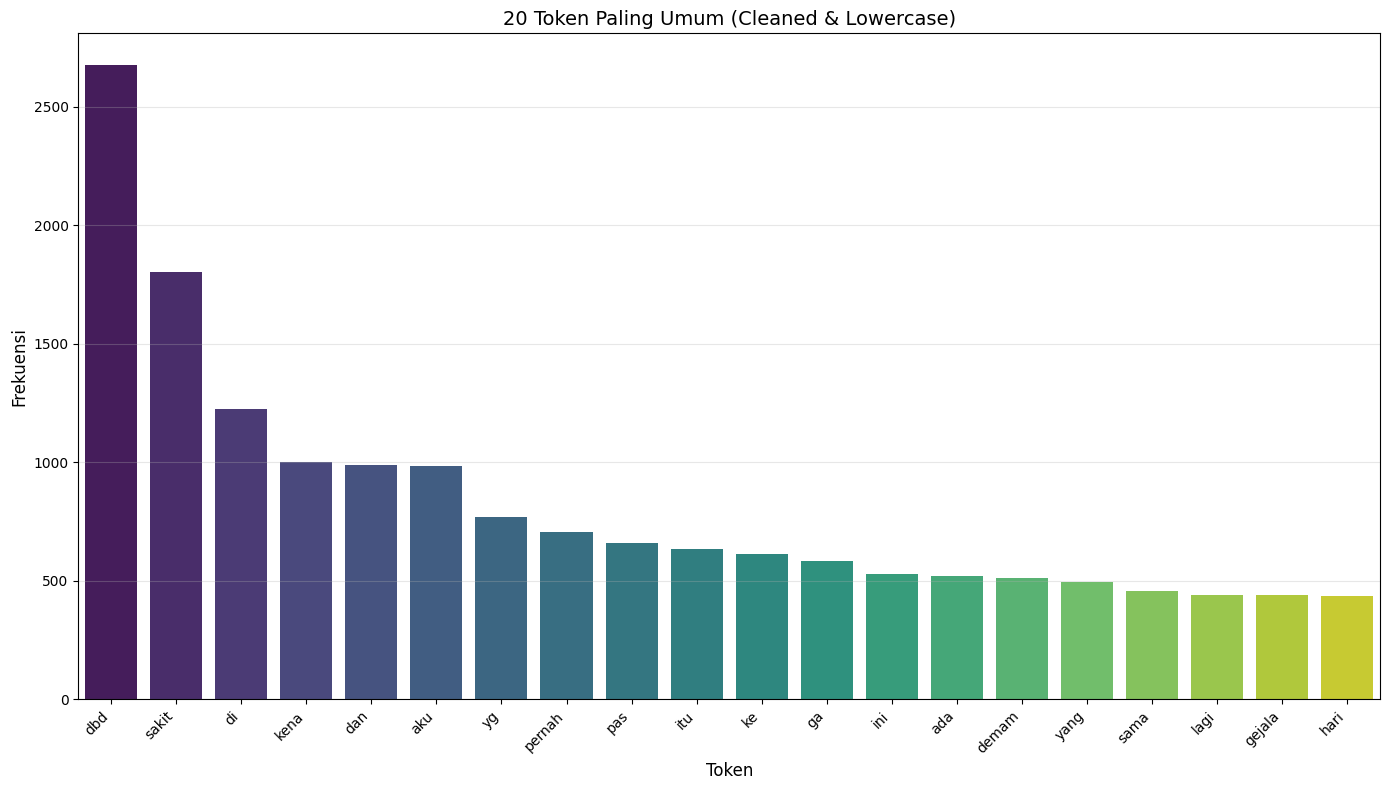


Top 20 Token:
 1. dbd            : 2675 kemunculan
 2. sakit          : 1804 kemunculan
 3. di             : 1226 kemunculan
 4. kena           : 1002 kemunculan
 5. dan            : 989 kemunculan
 6. aku            : 982 kemunculan
 7. yg             : 771 kemunculan
 8. pernah         : 706 kemunculan
 9. pas            : 659 kemunculan
10. itu            : 635 kemunculan
11. ke             : 613 kemunculan
12. ga             : 585 kemunculan
13. ini            : 529 kemunculan
14. ada            : 521 kemunculan
15. demam          : 511 kemunculan
16. yang           : 495 kemunculan
17. sama           : 459 kemunculan
18. lagi           : 440 kemunculan
19. gejala         : 438 kemunculan
20. hari           : 436 kemunculan

File berhasil disimpan sebagai: token_processed_data_20250601_070119.csv
Struktur kolom akhir:
['Name', 'Handle', 'Timestamp', 'Verified', 'text', 'Comments', 'Retweets', 'Likes', 'Analytics', 'Tags', 'Mentions', 'Emojis', 'Profile Image', 'Tweet Link', 'Tweet

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


# Tokenisasi teks dari kolom text_cleaned_lower
df_before = df.shape[0]
print(f"\nJumlah data sebelum tokenisasi: {df_before}")

# Fungsi untuk tokenisasi teks
def tokenize_text(text):
    if pd.isna(text) or text == '':
        return []
    return word_tokenize(text)

# Menerapkan tokenisasi pada kolom text_cleaned_lower
df['cleaned_lower_tokens'] = df['text_cleaned_lower'].apply(tokenize_text)

# Menampilkan contoh hasil tokenisasi
print("\nContoh hasil tokenisasi:")
for i in range(min(5, df.shape[0])):
    print(f"Text Original: {df.iloc[i]['text']}")
    print(f"Text Cleaned Lower: {df.iloc[i]['text_cleaned_lower']}")
    print(f"Tokens: {df.iloc[i]['cleaned_lower_tokens']}")
    print("-" * 70)

print(f"Jumlah data setelah tokenisasi: {df.shape[0]}")

# EDA: Distribusi jumlah token per teks
df['token_count'] = df['cleaned_lower_tokens'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(df['token_count'], bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribusi Jumlah Token per Teks (Cleaned & Lowercase)')
plt.xlabel('Jumlah Token')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nStatistik Token:")
print(f"Rata-rata: {df['token_count'].mean():.2f}")
print(f"Minimum: {df['token_count'].min()}")
print(f"Maksimum: {df['token_count'].max()}")

# EDA: Token yang paling sering muncul
all_tokens = [token for tokens in df['cleaned_lower_tokens'] for token in tokens]
token_freq = Counter(all_tokens)
top_tokens = token_freq.most_common(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=[token[0] for token in top_tokens], y=[token[1] for token in top_tokens], palette='viridis')
plt.title('20 Token Paling Umum (Cleaned & Lowercase)', fontsize=14)
plt.xlabel('Token', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 20 Token:")
for idx, (token, freq) in enumerate(top_tokens, 1):
    print(f"{idx:2d}. {token:15s}: {freq} kemunculan")

# Ekspor data lengkap
current_datetime = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
export_filename = f"token_processed_data_{current_datetime}.csv"

# Simpan dengan semua kolom
df.to_csv(export_filename, index=False)

print(f"\nFile berhasil disimpan sebagai: {export_filename}")
print("Struktur kolom akhir:")
print(df.columns.tolist())

# Download file
files.download(export_filename)


In [ ]:
# Download resource NLTK yang diperlukan
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Download resource tambahan jika diperlukan
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from google.colab import files

# Install NLTK resources jika belum ada
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



=== PROSES STOPWORD REMOVAL ===
Jumlah stopwords yang digunakan: 794

Contoh hasil stopword removal:
Original: Tipes?
Mending ke dokter, kalau sakit biasa minum obat pasti sembuh.
P...
Tokens  : ['tipes', 'mending', 'ke', 'dokter', 'kalau', 'sakit', 'biasa', 'minum', 'obat', 'pasti']...
Filtered: ['tipes', 'mending', 'dokter', 'sakit', 'minum', 'obat', 'sembuh', 'pengalaman', 'kemarin', 'bgt']...
--------------------------------------------------------------------------------
Original: Tapi pas bapak sakit DBD (saya umur 8, kelas 4 SD), kami yg tinggal se...
Tokens  : ['tapi', 'pas', 'bapak', 'sakit', 'dbd', 'saya', 'umur', 'kelas', 'sd', 'kami']...
Filtered: ['pas', 'sakit', 'dbd', 'umur', 'kelas', 'sd', 'tinggal', 'serumah', 'tes', 'darah']...
--------------------------------------------------------------------------------
Original: Kayak aku waktu itu sakit DBD dan tifus harus dirawat, dihari yang sam...
Tokens  : ['kayak', 'aku', 'waktu', 'itu', 'sakit', 'dbd', 'dan', 'tifus', 'ha

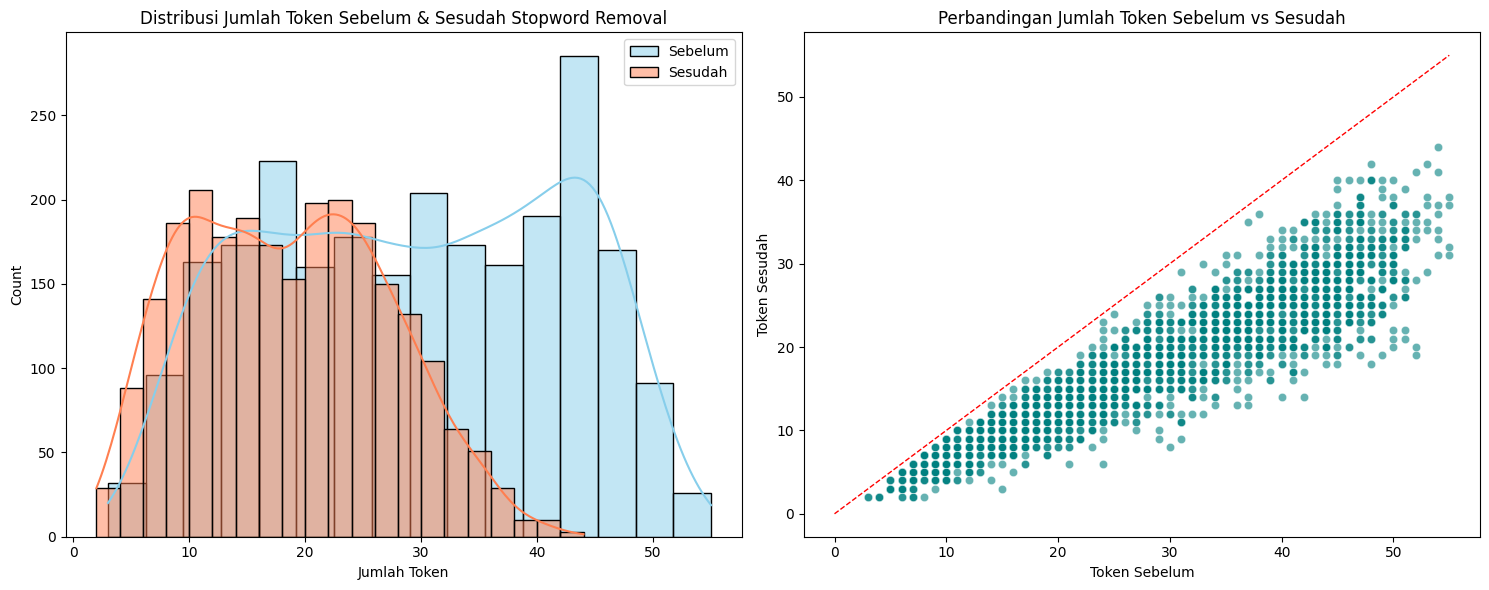

<ipython-input-20-1859d5d4a454>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[t[0] for t in token_freq_filtered],


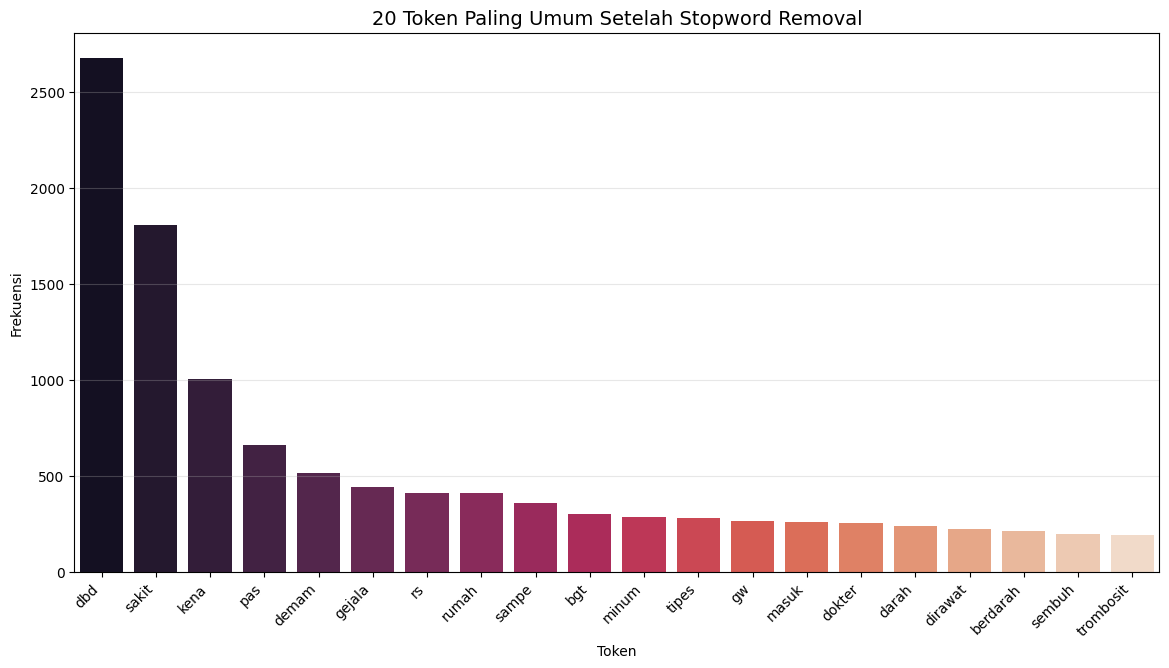


=== LAPORAN STATISTIK ===
Reduksi token rata-rata: 37.3%
Total token sebelum: 72821
Total token sesudah: 45662

Top 5 token setelah filtering:
- dbd: 2675 kemunculan
- sakit: 1804 kemunculan
- kena: 1002 kemunculan
- pas: 659 kemunculan
- demam: 511 kemunculan


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Download resources
nltk.download('stopwords')

# Inisialisasi stopwords
base_stopwords = set(stopwords.words('indonesian'))
custom_stopwords = {
    'yg', 'dgn', 'utk', 'jg', 'tdk', 'gak', 'ga', 'nya', 'aja', 'sih',
    'kalo', 'klo', 'gitu', 'nih', 'ya', 'kan', 'ku', 'mu', 'kok', 'si',
    'ah', 'ih', 'eh', 'deh', 'loh', 'tuh', 'gue', 'lu', 'lo', 'kita',
    'aku', 'kamu', 'dia', 'mereka', 'kami', 'kalian', 'tau', 'mah', 'nya',
    'sama', 'udah', 'banget', 'dah', 'nya', 'tsb', 'dg', 'dr', 'pd', 'dll'
}
stop_words = base_stopwords.union(custom_stopwords)

# 1. Stopword Removal pada cleaned_lower_tokens
print("\n=== PROSES STOPWORD REMOVAL ===")
print(f"Jumlah stopwords yang digunakan: {len(stop_words)}")

# Fungsi optimasi untuk remove stopwords
def remove_stopwords(tokens):
    if not isinstance(tokens, list):  # Handle non-list inputs
        return []
    return [token for token in tokens if token not in stop_words]

# Membuat kolom baru
df['cleaned_lower_tokens_no_stop'] = df['cleaned_lower_tokens'].apply(remove_stopwords)

# 2. Analisis Perbandingan
# Hitung token sebelum dan sesudah
df['token_count_before_stop'] = df['cleaned_lower_tokens'].apply(len)
df['token_count_after_stop'] = df['cleaned_lower_tokens_no_stop'].apply(len)

# Contoh hasil
print("\nContoh hasil stopword removal:")
for i in range(min(3, df.shape[0])):
    print(f"Original: {df.iloc[i]['text'][:70]}...")
    print(f"Tokens  : {df.iloc[i]['cleaned_lower_tokens'][:10]}...")
    print(f"Filtered: {df.iloc[i]['cleaned_lower_tokens_no_stop'][:10]}...")
    print("-" * 80)

# 3. Visualisasi Komparasi
plt.figure(figsize=(15, 6))

# Before-After Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='token_count_before_stop', color='skyblue', label='Sebelum', kde=True)
sns.histplot(data=df, x='token_count_after_stop', color='coral', label='Sesudah', kde=True)
plt.title('Distribusi Jumlah Token Sebelum & Sesudah Stopword Removal')
plt.xlabel('Jumlah Token')
plt.legend()

# Scatterplot Comparison
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='token_count_before_stop', y='token_count_after_stop',
                alpha=0.6, color='teal')
plt.plot([0, df['token_count_before_stop'].max()],
         [0, df['token_count_before_stop'].max()],
         'r--', linewidth=1)
plt.title('Perbandingan Jumlah Token Sebelum vs Sesudah')
plt.xlabel('Token Sebelum')
plt.ylabel('Token Sesudah')

plt.tight_layout()
plt.show()

# 4. Analisis Token setelah Stopword Removal
# Frekuensi token
all_tokens_filtered = [token for tokens in df['cleaned_lower_tokens_no_stop'] for token in tokens]
token_freq_filtered = Counter(all_tokens_filtered).most_common(20)

# Visualisasi
plt.figure(figsize=(14, 7))
sns.barplot(x=[t[0] for t in token_freq_filtered],
            y=[t[1] for t in token_freq_filtered],
            palette='rocket')
plt.title('20 Token Paling Umum Setelah Stopword Removal', fontsize=14)
plt.xlabel('Token')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Laporan statistik
print("\n=== LAPORAN STATISTIK ===")
print(f"Reduksi token rata-rata: {(1 - (df['token_count_after_stop'].mean()/df['token_count_before_stop'].mean())):.1%}")
print(f"Total token sebelum: {df['token_count_before_stop'].sum()}")
print(f"Total token sesudah: {df['token_count_after_stop'].sum()}")
print("\nTop 5 token setelah filtering:")
for token, freq in token_freq_filtered[:5]:
    print(f"- {token}: {freq} kemunculan")

# 5. Ekspor Data Final
df['text_clean_final'] = df['cleaned_lower_tokens_no_stop'].apply(lambda x: ' '.join(x))

export_filename = f"nostopwords_preprocessed_data_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
df.to_csv(export_filename, index=False)
files.download(export_filename)


# Stemming

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

In [ ]:
# Memuat data yang sudah dibersihkan dari stopwords
df = pd.read_csv('nostopwords_preprocessed_data_20250601_070156.csv')

# Menampilkan informasi awal dataset
print("Informasi Awal Dataset:")
print(f"Jumlah data: {df.shape[0]}")
print(f"Kolom: {df.columns.tolist()}")
print(df.head())


Informasi Awal Dataset:
Jumlah data: 2480
Kolom: ['Name', 'Handle', 'Timestamp', 'Verified', 'text', 'Comments', 'Retweets', 'Likes', 'Analytics', 'Tags', 'Mentions', 'Emojis', 'Profile Image', 'Tweet Link', 'Tweet ID', 'language', 'text_cleaned', 'text_cleaned_lower', 'text_cleaned_lower_length', 'cleaned_lower_tokens', 'token_count', 'cleaned_lower_tokens_no_stop', 'token_count_before_stop', 'token_count_after_stop', 'text_clean_final']
             Name            Handle                 Timestamp  Verified  \
0             Yuu     @Argoonautkun  2023-04-30T06:07:52.000Z     False   
1  Wahyu Prasetya  @MrWahyuPrasetya  2023-04-30T03:39:10.000Z     False   
2            Dhea      @dheawardani  2023-04-29T14:37:36.000Z     False   
3           C-Cat          @WYATB23  2023-04-29T08:18:46.000Z     False   
4         Margaux  @killiantology__  2023-04-27T14:59:37.000Z     False   

                                                text  Comments  Retweets  \
0  Tipes?\nMending ke dokter, 

In [ ]:
# Instal Sastrawi
!pip install Sastrawi

# Install emoji
!pip install emoji

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import emoji
import matplotlib.pyplot as plt
import seaborn as sns

# Muat data yang sudah diproses (setelah stopwords)
df = pd.read_csv('nostopwords_preprocessed_data_20250601_070156.csv')

# Tampilkan informasi awal dataset
print("Informasi Awal Dataset:")
print(f"Jumlah data: {df.shape[0]}")
print(f"Kolom: {df.columns.tolist()}")
print(df.head())


Informasi Awal Dataset:
Jumlah data: 2480
Kolom: ['Name', 'Handle', 'Timestamp', 'Verified', 'text', 'Comments', 'Retweets', 'Likes', 'Analytics', 'Tags', 'Mentions', 'Emojis', 'Profile Image', 'Tweet Link', 'Tweet ID', 'language', 'text_cleaned', 'text_cleaned_lower', 'text_cleaned_lower_length', 'cleaned_lower_tokens', 'token_count', 'cleaned_lower_tokens_no_stop', 'token_count_before_stop', 'token_count_after_stop', 'text_clean_final']
             Name            Handle                 Timestamp  Verified  \
0             Yuu     @Argoonautkun  2023-04-30T06:07:52.000Z     False   
1  Wahyu Prasetya  @MrWahyuPrasetya  2023-04-30T03:39:10.000Z     False   
2            Dhea      @dheawardani  2023-04-29T14:37:36.000Z     False   
3           C-Cat          @WYATB23  2023-04-29T08:18:46.000Z     False   
4         Margaux  @killiantology__  2023-04-27T14:59:37.000Z     False   

                                                text  Comments  Retweets  \
0  Tipes?\nMending ke dokter, 

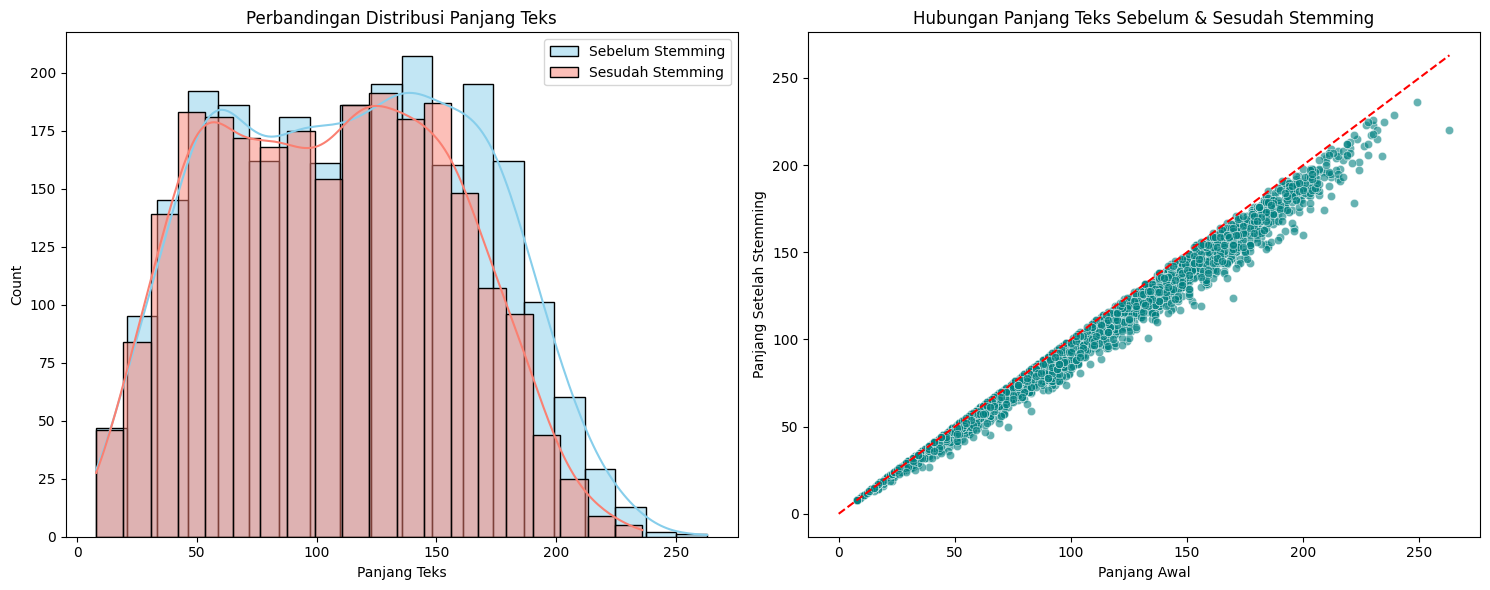


Contoh Hasil Stemming:

Original (160 karakter):
tipes mending dokter sakit minum obat sembuh pengalaman kemarin bgt demam trus minum panadol obat de...

Stemmed (154 karakter):
tipes mending dokter sakit minum obat sembuh alam kemarin bgt demam trus minum panadol obat demam se...
--------------------------------------------------------------------------------

Original (127 karakter):
pas sakit dbd umur kelas sd tinggal serumah tes darah ketahuan goldar muka gabungan muka kulit mjdi ...

Stemmed (115 karakter):
pas sakit dbd umur kelas sd tinggal rumah tes darah tahu goldar muka gabung muka kulit mjdi cerah fy...
--------------------------------------------------------------------------------

Original (159 karakter):
kayak sakit dbd tifus dirawat dihari kucingku sakit parasit darah dbd kucing dirawat pas sembuh pula...

Stemmed (145 karakter):
kayak sakit dbd tifus rawat hari kucing sakit parasit darah dbd kucing rawat pas sembuh pulang kucin...
-------------------------------------

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Data berhasil disimpan sebagai: stemmed_data_20250601_071248.xlsx
Kolom yang tersedia:
['Name', 'Handle', 'Timestamp', 'Verified', 'text', 'Comments', 'Retweets', 'Likes', 'Analytics', 'Tags', 'Mentions', 'Emojis', 'Profile Image', 'Tweet Link', 'Tweet ID', 'language', 'text_cleaned', 'text_cleaned_lower', 'text_cleaned_lower_length', 'cleaned_lower_tokens', 'token_count', 'cleaned_lower_tokens_no_stop', 'token_count_before_stop', 'token_count_after_stop', 'text_clean_final', 'text_stemmed', 'clean_length', 'stemmed_length']


In [ ]:
# 2. INISIALISASI STEMMER
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 3. FUNGSI STEMMING YANG DIOPTIMASI
def stemming_text(text):
    if pd.isna(text) or not isinstance(text, str) or text.strip() == '':
        return text
    return stemmer.stem(text)

# 4. APLIKASI STEMMING KE KOLOM TEXT_CLEAN_FINAL
df['text_stemmed'] = df['text_clean_final'].apply(stemming_text)

# 5. ANALISIS HASIL STEMMING
# Hitung panjang teks sebelum dan sesudah
df['clean_length'] = df['text_clean_final'].str.len().fillna(0)
df['stemmed_length'] = df['text_stemmed'].str.len().fillna(0)

# 6. VISUALISASI PERBANDINGAN
plt.figure(figsize=(15, 6))

# Plot distribusi panjang teks
plt.subplot(1, 2, 1)
sns.histplot(df['clean_length'], color='skyblue', label='Sebelum Stemming', kde=True)
sns.histplot(df['stemmed_length'], color='salmon', label='Sesudah Stemming', kde=True)
plt.title('Perbandingan Distribusi Panjang Teks')
plt.xlabel('Panjang Teks')
plt.legend()

# Plot scatter perbandingan
plt.subplot(1, 2, 2)
sns.scatterplot(x='clean_length', y='stemmed_length', data=df, alpha=0.6, color='teal')
plt.plot([0, df['clean_length'].max()], [0, df['clean_length'].max()], 'r--')
plt.title('Hubungan Panjang Teks Sebelum & Sesudah Stemming')
plt.xlabel('Panjang Awal')
plt.ylabel('Panjang Setelah Stemming')

plt.tight_layout()
plt.show()

# 7. CONTOH HASIL LENGKAP DENGAN TRUNCATE
print("\nContoh Hasil Stemming:")
for i in range(min(5, df.shape[0])):
    original = df.iloc[i]['text_clean_final'][:100] + '...' if len(df.iloc[i]['text_clean_final']) > 100 else df.iloc[i]['text_clean_final']
    stemmed = df.iloc[i]['text_stemmed'][:100] + '...' if len(df.iloc[i]['text_stemmed']) > 100 else df.iloc[i]['text_stemmed']

    print(f"\nOriginal ({len(df.iloc[i]['text_clean_final'])} karakter):")
    print(original)
    print(f"\nStemmed ({len(df.iloc[i]['text_stemmed'])} karakter):")
    print(stemmed)
    print("-"*80)

# 8. EKSPOR DATA DENGAN TIMESTAMP
from datetime import datetime
output_filename = f"stemmed_data_{datetime.now().strftime('%Y%m%d_%H%M%S')}.xlsx"
df.to_excel(output_filename, index=False)

# 9. DOWNLOAD FILE
files.download(output_filename)
print(f"\nData berhasil disimpan sebagai: {output_filename}")
print("Kolom yang tersedia:")
print(df.columns.tolist())
